In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
directory = 'extra_cropped_data/data_ground/'
filename = '10.jpg'
filepath = os.path.join(directory, filename)

pic = cv2.imread(filepath)
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_pic)

In [ ]:
img_lab = cv2.cvtColor(pic, cv2.COLOR_BGR2Lab)
img_hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)
img_YCbCr = cv2.cvtColor(pic, cv2.COLOR_BGR2YCR_CB)
img_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

In [ ]:
plt.figure(figsize=(20,10))

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].imshow(img_rgb) 
ax[0, 1].imshow(img_rgb[:,:,0], cmap='gray') 
ax[1, 0].imshow(img_rgb[:,:,1], cmap='gray') 
ax[1, 1].imshow(img_rgb[:,:,2], cmap='gray') 

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].imshow(img_lab) 
ax[0, 1].imshow(img_lab[:,:,0], cmap='gray') 
ax[1, 0].imshow(img_lab[:,:,1], cmap='gray') 
ax[1, 1].imshow(img_lab[:,:,2], cmap='gray') 

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

fig, ax = plt.subplots(2, 2, figsize=(20, 10))


ax[0, 0].imshow(img_hsv) 
ax[0, 1].imshow(img_hsv[:,:,0], cmap='gray') 
ax[1, 0].imshow(img_hsv[:,:,1], cmap='gray') 
ax[1, 1].imshow(img_hsv[:,:,2], cmap='gray') 

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].imshow(img_YCbCr) 
ax[0, 1].imshow(img_YCbCr[:,:,0], cmap='gray') 
ax[1, 0].imshow(img_YCbCr[:,:,1], cmap='gray') 
ax[1, 1].imshow(img_YCbCr[:,:,2], cmap='gray') 

plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

plt.imshow(img_YCbCr)

fig.savefig("YCbCrfull.png")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

plt.imshow(img_YCbCr[:,:,0], cmap='gray')

fig.savefig("YCbCr_Y.png")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

plt.imshow(img_YCbCr[:,:,1], cmap='gray')

fig.savefig("YCbCr_Cb.png")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

plt.imshow(img_YCbCr[:,:,2], cmap='gray')

fig.savefig("YCbCr_Cr.png")

In [ ]:
import numpy as np

plt.figure(figsize=(10, 7))
mask = cv2.inRange(img_hsv, (10, 100, 20), (25, 255, 255))
img_hsv_orange = cv2.bitwise_and(img_hsv,img_hsv,mask = mask)
img_hsv_orange = np.array(img_hsv_orange/255,np.float32)
plt.imshow(img_hsv_orange)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import numpy as np
plt.figure(figsize=(10, 7))

n_clusters = 7
w, h, d = original_shape = tuple(rgb_pic.shape)
image_array = np.reshape(rgb_pic, (w * h, d))
kmeans = KMeans(n_clusters, random_state=0).fit(image_array)


labels =  kmeans.labels_
image = np.zeros((w, h, d))
label_idx = 0
color = [0, 0, 0]
for i in range(w):
    for j in range(h):
        if(labels[label_idx] == 0):
            color = [255, 0, 0]
        if(labels[label_idx] == 1):
            color = [0, 255, 0]
        if(labels[label_idx] == 2):
            color = [0, 0, 255]
        if(labels[label_idx] == 3):
            color = [0, 255, 255]        
        if(labels[label_idx] == 4):
            color = [255, 0, 255]
        if(labels[label_idx] == 5):
            color = [255, 255, 255]    
        if(labels[label_idx] == 6):
            color = [0, 0, 0] 
            
        image[i][j][:] = color
        label_idx += 1

image = np.array(image/255,np.float32)
plt.imshow(image)
cv2.imwrite('clust2_p.jpg', image)

In [ ]:
can1 = cv2.cvtColor(img_hsv_orange, cv2.COLOR_RGB2GRAY)
can2 = img_hsv[:,:,0]
can3 = img_YCbCr[:,:,2]
can4 = image

In [ ]:
print(can1.shape)
print(can2.shape)
print(can3.shape)
print(can4.shape)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].imshow(can1, cmap='gray') 
ax[0,1].imshow(can2, cmap='gray') 
ax[1,0].imshow(can3, cmap='gray') 
ax[1,1].imshow(can4, cmap='gray') 
plt.show()

In [ ]:
ret,thresh1 = cv2.threshold(can1,0,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(can2,20,255,cv2.THRESH_BINARY_INV)
thresh2 = cv2.medianBlur(thresh2, 3)
ret,thresh3 = cv2.threshold(can3,100,255,cv2.THRESH_BINARY_INV)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].imshow(thresh1, cmap='gray') 
ax[0,1].imshow(thresh2, cmap='gray') 
ax[1,0].imshow(thresh3, cmap='gray') 
ax[1,1].imshow(can4, cmap='gray') 
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(thresh3, cmap='gray')

plt.savefig("YCbCr_thresh.png")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(thresh2, cmap='gray')

plt.savefig("HSV_H_thresh.png")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(thresh1, cmap='gray')

plt.savefig("Orange_thresh.png")

In [ ]:
plt.figure(figsize=(10,7))
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh3, rgb_pic[:,:,0], 0)
res[:,:,1] = np.where(thresh3, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh3, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(res, cmap='gray')

plt.savefig("YCbCr_applied.png")

In [ ]:
plt.figure(figsize=(10,7))
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh1, rgb_pic[:,:,0], 0)
res[:,:,1] = np.where(thresh1, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh1, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(res, cmap='gray')

plt.savefig("Orange_applied.png")

In [ ]:
plt.figure(figsize=(10,7))
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh2, rgb_pic[:,:,0], 0)
res[:,:,1] = np.where(thresh2, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh2, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

plt.imshow(res, cmap='gray')

plt.savefig("HSV_H_applied.png")

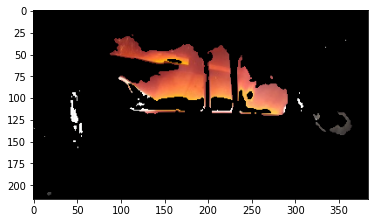

In [2]:
# Детекция на основе цветового пространства HSV

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'extra_cropped_data/data_ground/'
filename = '10.jpg'
filepath = os.path.join(directory, filename)

pic = cv2.imread(filepath)
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
w, h, d = original_shape = tuple(rgb_pic.shape)

img_hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV) # конвертирование в HSV

can2 = img_hsv[:,:,0] # проекция изображения на канал "H" цветового пространства HSV

ret, thresh2 = cv2.threshold(can2,20,255,cv2.THRESH_BINARY_INV) # создание маски threshold с параметрами
thresh2 = cv2.medianBlur(thresh2, 3)

# Применение threshold маски к RGB изображению
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh2, rgb_pic[:,:,0], 0) 
res[:,:,1] = np.where(thresh2, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh2, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

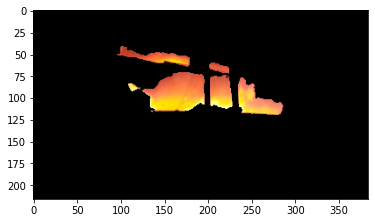

In [3]:
# Детекция на основе цветового пространства YCbCr

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'extra_cropped_data/data_ground/'
filename = '10.jpg'
filepath = os.path.join(directory, filename)

pic = cv2.imread(filepath)
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
w, h, d = original_shape = tuple(rgb_pic.shape)

img_YCbCr = cv2.cvtColor(pic, cv2.COLOR_BGR2YCR_CB) # конвертирование в YCbCr

can3 = img_YCbCr[:,:,2] # проекция изображения на канал "Cr" цветового пространства YCbCr

ret,thresh3 = cv2.threshold(can3,100,255,cv2.THRESH_BINARY_INV) # создание маски threshold с параметрами

# Применение threshold маски к RGB изображению
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh3, rgb_pic[:,:,0], 0) 
res[:,:,1] = np.where(thresh3, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh3, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

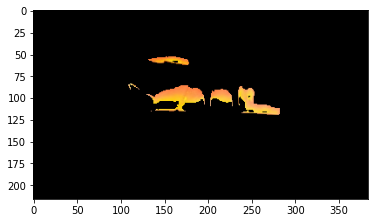

In [4]:
# Детекция на основе выделения оранжевого цвета

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'extra_cropped_data/data_ground/'
filename = '10.jpg'
filepath = os.path.join(directory, filename)

pic = cv2.imread(filepath)
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
w, h, d = original_shape = tuple(rgb_pic.shape)

img_hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV) # конвертирование в HSV

# выделение оранжевого цвета
mask = cv2.inRange(img_hsv, (10, 100, 20), (25, 255, 255))
img_hsv_orange = cv2.bitwise_and(img_hsv,img_hsv,mask = mask)
img_hsv_orange = np.array(img_hsv_orange/255,np.float32)
can1 = cv2.cvtColor(img_hsv_orange, cv2.COLOR_RGB2GRAY)

# создание маски threshold с параметрами
ret,thresh1 = cv2.threshold(can1,0,255,cv2.THRESH_BINARY)

# Применение threshold маски к RGB изображению
res = np.zeros((w,h,d))
res[:,:,0] = np.where(thresh1, rgb_pic[:,:,0], 0) 
res[:,:,1] = np.where(thresh1, rgb_pic[:,:,1], 0)
res[:,:,2] = np.where(thresh1, rgb_pic[:,:,2], 0)

res = np.array(res/255,np.float32)

plt.imshow(res)

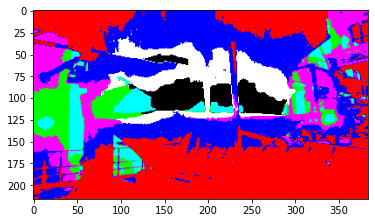

In [6]:
# Эксперимент кластеризации с помощью k-means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import numpy as np

n_clusters = 7
w, h, d = original_shape = tuple(rgb_pic.shape)
image_array = np.reshape(rgb_pic, (w * h, d))
kmeans = KMeans(n_clusters, random_state=0).fit(image_array)


labels =  kmeans.labels_
image = np.zeros((w, h, d))
label_idx = 0
color = [0, 0, 0]
for i in range(w):
    for j in range(h):
        if(labels[label_idx] == 0):
            color = [255, 0, 0]
        if(labels[label_idx] == 1):
            color = [0, 255, 0]
        if(labels[label_idx] == 2):
            color = [0, 0, 255]
        if(labels[label_idx] == 3):
            color = [0, 255, 255]        
        if(labels[label_idx] == 4):
            color = [255, 0, 255]
        if(labels[label_idx] == 5):
            color = [255, 255, 255]    
        if(labels[label_idx] == 6):
            color = [0, 0, 0] 
            
        image[i][j][:] = color
        label_idx += 1

image = np.array(image/255,np.float32)
plt.imshow(image)